# Perkenalan

Graded Challenge 5

Nama  : Kelvin Rizky Novsa
    
Batch : RMT-028

Referensi Schema : [Sumber](https://inseaddataanalytics.github.io/INSEADAnalytics/CourseSessions/ClassificationProcessCreditCardDefault.html#step_1:_split_the_data)

Program ini dibuatkan untuk memprediksi apakah seseorang nasabah akan di-default kartu kreditnya di bulan dan
model yang diharapkan dapat meminimalisir False Negative (gagal bayar tapi diprediksi sebaliknya) dan menekan False Positive
(tidak gagal bayar namun diprediksi sebaliknya). Oleh karena itu metric yang digunakan dalam mengukur performa program (model) ini adalah F1 Score karena 
dapat melihat harmonisasi Precision dan Recall.


# Query SQL

Mengambil data pada Big Query Menggunakan SQL dengan kriteria GC yang diminta
```
SELECT
  limit_balance,
  CAST(sex AS INT64) AS sex,
  CAST(education_level AS INT64) AS education_level,
  CAST(marital_status AS INT64) AS marital_status,
  age,
  pay_0,
  pay_2,
  pay_3,
  pay_4,
  CAST(pay_5 AS FLOAT64) AS pay_5,
  CAST(pay_6 AS FLOAT64) AS pay_6,
  bill_amt_1,
  bill_amt_2,
  bill_amt_3,
  bill_amt_4,
  bill_amt_5,
  bill_amt_6,
  pay_amt_1,
  pay_amt_2,
  pay_amt_3,
  pay_amt_4,
  pay_amt_5,
  pay_amt_6,
  CAST(default_payment_next_month AS INT64) AS default_payment_next_month
FROM
  `bigquery-public-data.ml_datasets.credit_card_default`
LIMIT 56000;
```

# Import Libary

In [1]:
# Melakukan import library yang digunakan

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import phik
from phik import phik_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import pickle


Melakukan import library yang akan digunakan

# Data Loading 

In [2]:
# Melakukan import data csv ke dalam dataframe menggunakan pandas serta melakukan pemanggilan dataframe

df_original = pd.read_csv("P1G5_Set_1_kelvin_rizky.csv")

# Duplikasi data ori
df = df_original.copy()

# Menampilkan 10 baris pertama dalam dataset
df.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
5,300000.0,2,4,2,32.0,0.0,0.0,0.0,0.0,0.0,...,65150.0,-450.0,700.0,15235.0,1491.0,1303.0,0.0,2000.0,1400.0,0
6,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
7,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,...,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
8,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,...,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
9,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,...,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0


Melakukan import data P1G5_Set_1_kelvin_rizky yang sebelumnya diambil pada bigquery data set dan memasukkannya ke dalam dataframe menggunakan pandas. Kemudian menampilkan 10 baris pertama pada dataset.

In [3]:
# Menampilkan 10 baris terakhir dalam dataset
df.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0
2956,100000.0,1,3,1,40.0,0.0,0.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,2000.0,2377.0,40000.0,0.0,0.0,0.0,0
2957,30000.0,2,3,1,48.0,1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0
2958,80000.0,2,3,1,39.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,5000.0,5000.0,5000.0,0.0,5000.0,5000.0,470.0,0
2959,20000.0,1,3,2,26.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,1560.0,0.0,0.0,0.0,0.0,0.0,0
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0
2964,290000.0,2,2,1,39.0,1.0,-2.0,-2.0,-2.0,-2.0,...,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0,0


Menampilkan 10 baris terakhir

In [4]:
# Menampikan informasi pada dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Menampilkan informasi di dalam dataset. Didapatkan informasi bahwa terdapat 2965 baris dan terdapat 2 tipe data dalam dataset seperti tipe data float yang berjumlah 20 dan tipe data integer yang berjumlah 4

In [5]:
# Menampilkan unik value di setiap kolom

df.nunique()

limit_balance                   59
sex                              2
education_level                  7
marital_status                   4
age                             49
pay_0                           11
pay_2                           10
pay_3                            9
pay_4                           10
pay_5                            9
pay_6                            8
bill_amt_1                    2643
bill_amt_2                    2592
bill_amt_3                    2549
bill_amt_4                    2504
bill_amt_5                    2482
bill_amt_6                    2461
pay_amt_1                     1415
pay_amt_2                     1372
pay_amt_3                     1302
pay_amt_4                     1214
pay_amt_5                     1194
pay_amt_6                     1189
default_payment_next_month       2
dtype: int64

Menampilkan seluurh nilai unik pada seluruh kolom.

In [6]:
# Melakukan pengecekan missing value di setiap kolom dataset

df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

Menampilkan seluruh missing value pada setiap kolom. Didapatkan informasi bahwa tidak terdapat missing value pada setiap kolom

In [7]:
# Menampilkan dan mengecek data duplikat yang ada di dalam dataset

df.duplicated().sum()

1

Menampilkan informasi data yang terdapat duplikasi dan didapatkan terdapat 1 baris yang memiliki duplikasi.

In [8]:
# Menampilkan nilai yang memiliki duplikasi
duplicate = df[df.duplicated()]

print("Duplikat baris: ")

duplicate

Duplikat baris: 


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2815,200000.0,2,1,1,34.0,1.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Menampilkan informasi data duplikasi dan didapatkan data yang terduplikasi terdapat pada index 2815 atau terdapat pada baris 2816. Oleh karena itu dapat dilakukan penghapusan duplikat data. 

In [9]:
# Melakukan drop data duplikat yang ada di dalam dataset

df = df.drop_duplicates()

Melakukan penghapusan data duplikasi dan memasukkan hasil penghapusan ke dalam dataset kembali

In [10]:
# Menampilkan dan mengecek kembali data duplikat yang ada di dalam dataset

print("Duplikat baris: ")
print(df[df.duplicated()])

Duplikat baris: 
Empty DataFrame
Columns: [limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month]
Index: []

[0 rows x 24 columns]


Menampilkan informasi data duplikasi yang sudah di hapus.

In [11]:
# Menampikan informasi pada dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2964 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2964 non-null   float64
 1   sex                         2964 non-null   int64  
 2   education_level             2964 non-null   int64  
 3   marital_status              2964 non-null   int64  
 4   age                         2964 non-null   float64
 5   pay_0                       2964 non-null   float64
 6   pay_2                       2964 non-null   float64
 7   pay_3                       2964 non-null   float64
 8   pay_4                       2964 non-null   float64
 9   pay_5                       2964 non-null   float64
 10  pay_6                       2964 non-null   float64
 11  bill_amt_1                  2964 non-null   float64
 12  bill_amt_2                  2964 non-null   float64
 13  bill_amt_3                  2964 non-n

Menampilkan informasi data pada setiap kolom setelah dilakukan penghapusan data duplikasi dan didapatkan pengurangan 1 baris dataset yang sebelumnya terdapat 2965 baris menjadi 2964 baris.

In [12]:
df['default_payment_next_month']

0       1
1       0
2       1
3       0
4       0
       ..
2960    0
2961    1
2962    1
2963    0
2964    0
Name: default_payment_next_month, Length: 2964, dtype: int64

Menampilkan jumlah value berdasarkan kategori pada kolom target yang akan dilakukan prediksi

# Exploratory Data Analysis (EDA)

In [13]:
# Membuat copy pada dataset untuk berfokus pada EDA

df_eda = df.copy()

df_eda

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0


Membuat data copy agar tidak merubah data pada proses Feature Engineering

## Jumlah Default pada dataset

Persentase default pada dataset : 21.423751686909583 %


[]

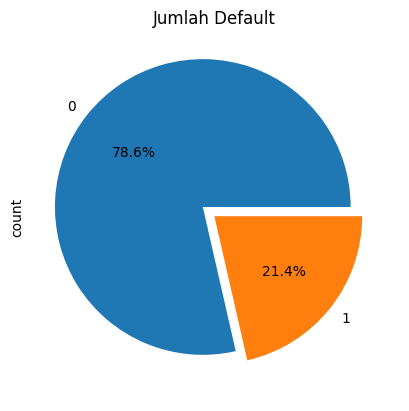

In [14]:
# Membuat grafik jumlah default menggunakan pie chart
persentase_default = df_eda.default_payment_next_month.sum() / len(df_eda.default_payment_next_month)
print(f'Persentase default pada dataset : {persentase_default*100} %')
df_eda['default_payment_next_month'].value_counts().plot(kind='pie',explode=[0.1,0],autopct="%1.1f%%")
plt.title('Jumlah Default')
plt.plot()

Berdasarkan informasi diatas bahwa default_payment_next_month yang dengan kategori 0 atau 'No' mendominasi pada kolom default_payment_next_month dengan persentase sebesar 78.6 persen dan kategori 1 atau 'Yes' sebesar 21.4 persen

## Membandingkan status pendidikan pada setiap default payment berdasarkan umur

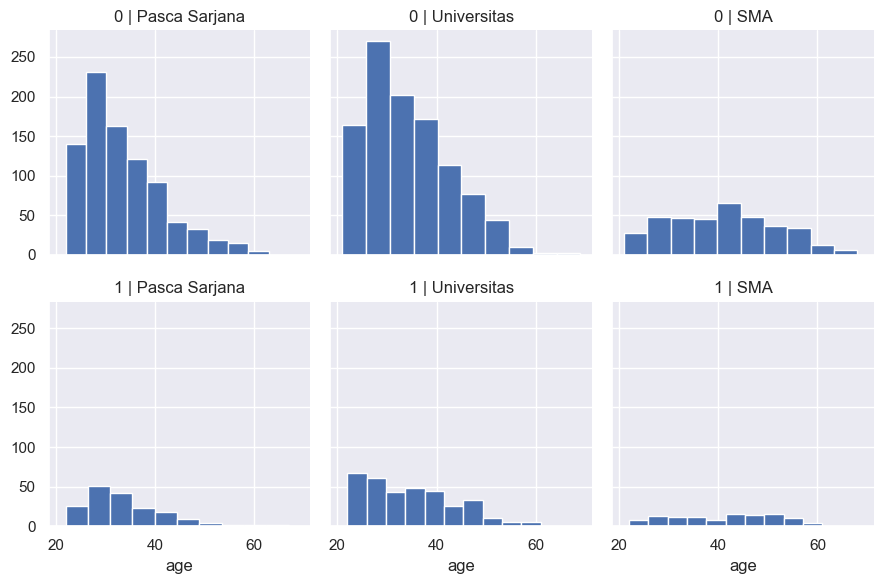

In [15]:
# Membuat mapping dari nilai lama ke nilai baru
status_pendidikan = {1: 'Pasca Sarjana', 2: 'Universitas', 3:'SMA'}

# Menggunakan map untuk mengubah label pada kolom 'education_level'
df_eda['education_level'] = df_eda['education_level'].map(status_pendidikan)

# Membuat histogram pada default_payment_next_month
education_level_default_pay_age = sns.set(rc={'figure.figsize':(10,8)})
education_level_default_pay_age = sns.FacetGrid(df_eda, row='default_payment_next_month', col='education_level')
education_level_default_pay_age = education_level_default_pay_age.set_titles(col_template="{col_name}", row_template="{row_name}")
education_level_default_pay_age = education_level_default_pay_age.map(plt.hist, 'age')
plt.show()

Berdasarkan informasi diatas, didapatkan bahwa status pendidikan Universitas pada kelompok umur 20-40 tahun memiliki kecenderungan gagal bayar yang sangat tinggi dibandingkan pasca sarjana dan SMA.

## Membandingkan Gender pada setiap default payment berdasarkan umur

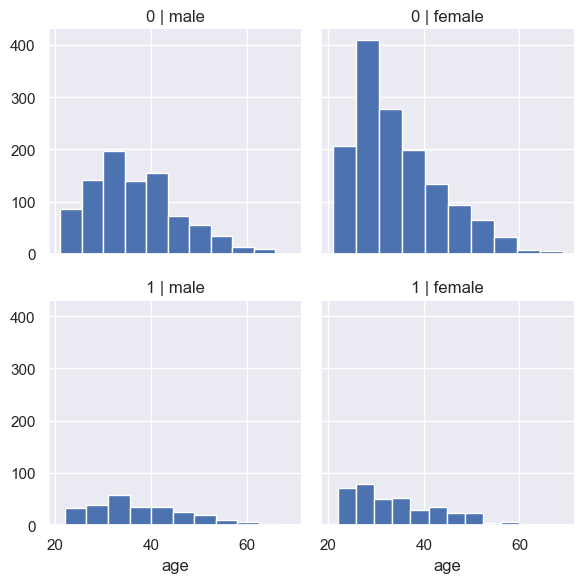

In [16]:
# Membuat mapping dari nilai lama ke nilai baru
jenis_kelamin = {1: 'male', 2: 'female'}

# Menggunakan map untuk mengubah label pada kolom 'sex'
df_eda['sex'] = df_eda['sex'].map(jenis_kelamin)

# Membuat histogram pada default_payment_next_month
sex_default_pay_age = sns.set(rc={'figure.figsize':(10,8)})
sex_default_pay_age = sns.FacetGrid(df_eda, row='default_payment_next_month', col='sex')
sex_default_pay_age = sex_default_pay_age.set_titles(col_template="{col_name}", row_template="{row_name}")
sex_default_pay_age = sex_default_pay_age.map(plt.hist, 'age')
plt.show()

Berdasarkan informasi diatas, didapatkan bahwa perempuan pada kelompok umur 20-30 tahun memiliki kecenderungan gagal bayar yang sangat tinggi dibandingkan laki-laki pada semua kelompok umur.

## Membandingkan status pernikahan pada setiap default payment berdasarkan umur

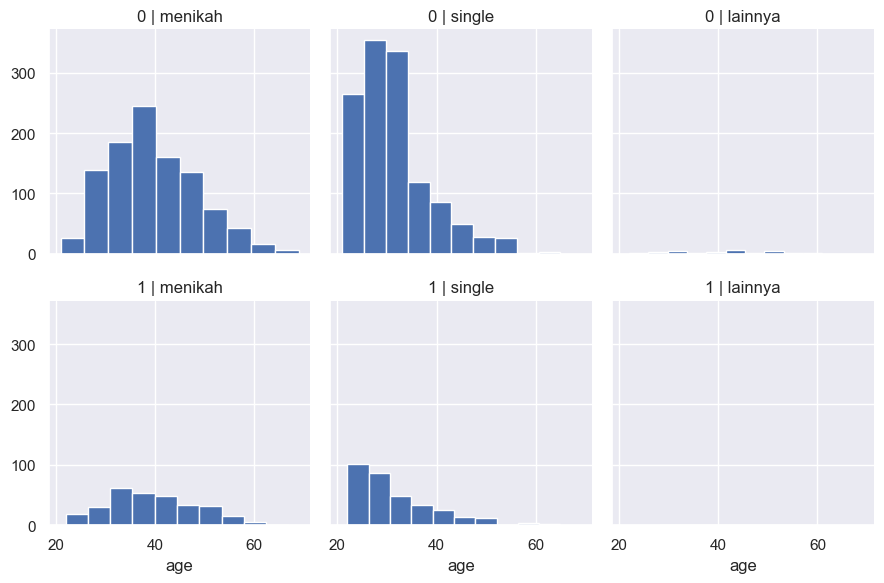

In [17]:
# Membuat mapping dari nilai lama ke nilai baru
status_pernikahan = {1: 'menikah', 2: 'single', 3:'lainnya'}

# Menggunakan map untuk mengubah label pada kolom 'marital_status'
df_eda['marital_status'] = df_eda['marital_status'].map(status_pernikahan)

# Membuat histogram pada default_payment_next_month
marital_status_default_pay_age = sns.set(rc={'figure.figsize':(10,8)})
marital_status_default_pay_age = sns.FacetGrid(df_eda, row='default_payment_next_month', col='marital_status')
marital_status_default_pay_age = marital_status_default_pay_age.set_titles(col_template="{col_name}", row_template="{row_name}")
marital_status_default_pay_age = marital_status_default_pay_age.map(plt.hist, 'age')
plt.show()

Berdasarkan informasi diatas, didapatkan bahwa bahwa orang yang sudah menikah antara kelompok usia 30 dan 50 tahun dan klien yang belum menikah berusia 20-30 tahun cenderung mengalami gagal bayar, sedangkan klien yang belum menikah memiliki kemungkinan lebih tinggi untuk gagal bayar.

## Grafik status pernikahan dan status pendidikan berdasarkan default_payment_next_month

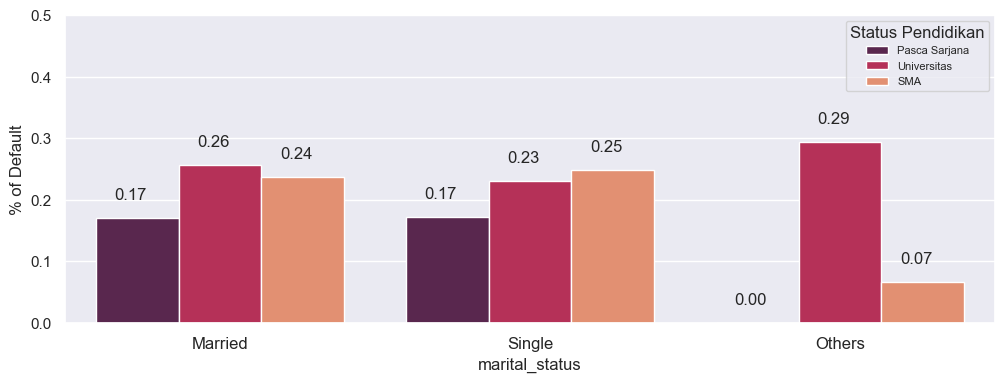

In [18]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "marital_status", y = "default_payment_next_month", hue = "education_level", data = df_eda, palette = 'rocket', errorbar = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2],['Married', 'Single','Others'], fontsize = 12)
plt.legend(['Pasca Sarjana', 'Universitas', 'SMA'], title = 'Status Pendidikan', fontsize = 8)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.06, p.get_height()+0.03),fontsize=12)

plt.show()

Berdasarkan visualisasi diatas, didapatkan bahwa pada status pernikahan menikah dan others dengan status pendidikan Universitas cenderung meningkatkan kemungkinan menjadi defaulter atau gagal bayar pada bulan depan. Sedangkan pada status pernikahan single dengan status pendidikan SMA cenderung meningkatkan kemungkinan menjadi defaulter atau gagal bayar pada bulan depan. 

## Grafik gender dan status pendidikan berdasarkan default_payment_next_month

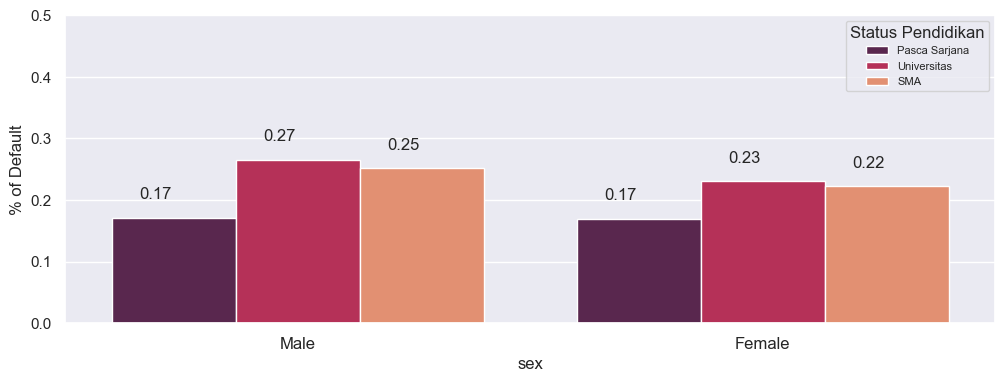

In [19]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "sex", y = "default_payment_next_month", hue = "education_level", data = df_eda, palette = 'rocket', errorbar = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)
plt.legend(['Pasca Sarjana', 'Universitas', 'SMA'], title = 'Status Pendidikan', fontsize = 8)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.06, p.get_height()+0.03),fontsize=12)

plt.show()

Berdasarkan visualisasi diatas, didapatkan bahwa pada gender male dengan status pendidikan Universitas cenderung meningkatkan kemungkinan menjadi defaulter atau gagal bayar pada bulan depan. Sedangkan pada gender dengan status pendidikan Universitas cenderung meningkatkan kemungkinan menjadi defaulter atau gagal bayar pada bulan depan. 

# Feature Engineering

## Split data X dan y

In [20]:
# Melakukan split data x dan y

X = df.drop(['default_payment_next_month'],axis=1)
y = df.default_payment_next_month

X.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0
5,300000.0,2,4,2,32.0,0.0,0.0,0.0,0.0,0.0,...,64747.0,65150.0,-450.0,700.0,15235.0,1491.0,1303.0,0.0,2000.0,1400.0
6,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,...,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0
7,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,...,122214.0,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0
8,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,...,171106.0,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0
9,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,...,165107.0,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0


Membagi data x dan y dengan variabel y sebagai target **default_payment_next_month** dan membuang variabel **default_payment_next_month** pada variabel x.

In [21]:
# Melakukan split antara data train dan test menggunakan train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print('X Train Size :', X_train.shape)
print('X Test Size :', X_test.shape)
print('y Train Size :', y_train.shape)
print('y Test Size :', y_test.shape)

X Train Size : (2371, 23)
X Test Size : (593, 23)
y Train Size : (2371,)
y Test Size : (593,)


Melakukan split pada variabel X dan y menjadi data train dan test

## Feature Selection

interval columns not set, guessing: ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment_next_month']


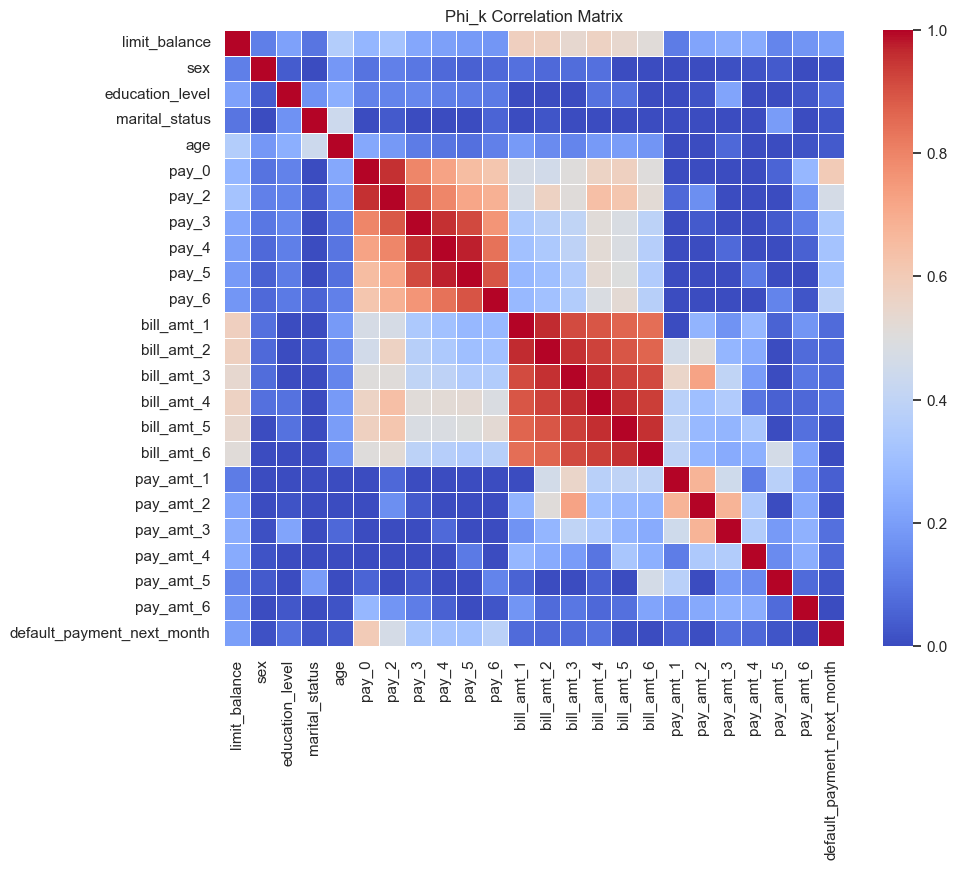

In [22]:
# get the phi_k correlation matrix between all variables
correlation_matrix = df.phik_matrix()


# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Phi_k Correlation Matrix')
plt.show()

Berdasarkan visualisasi diatas, variabel X yang akan digunakan dalam model seperti 'limit_balance', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6' untuk memprediksi variabel y (default_payment_next_month) karena korelasi diatas 0.1

## Outlier Handling

Tidak melakukan outlier handling karena outlier bersifat alami dalam dataset. (Sudah melakukan outlier handling mengugnakan trim dan capping namun hasil yang diberikan tidak cukup baik jika dibandingkan masih menggunakan outlier pada data)

## Handling Missing Value

Tidak terdapat missing value pada dataset.

## Split Column

In [23]:
# Membagi kolom kategori dan numerik pada variabel X
X_train_num = X_train[['limit_balance']]
X_test_num = X_test[['limit_balance']]

X_train_cat = X_train[['pay_0','pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]
X_test_cat = X_test[['pay_0','pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]

Memilih kolom yang akan digunakan dan melakukan pemindahan kolom numerik dan kategorial 

## Feature Scaling

In [24]:
# Melakukan scaling menggunakan MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_num) 

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.37974684],
       [0.16455696],
       [0.16455696],
       ...,
       [0.08860759],
       [0.17721519],
       [0.01265823]])

Melakukan Scaling menggunakan MinMaxScaler karena terdapat data outlier dalam data numerik dan distribusinya belum normal

## Feature Encoding

Tidak melakukan Encoding 

## Gabungkan data X_train dan X_test

In [25]:
# Menggabungkan data numerik dan kategori dan dimasukkan ke dalam variabel X_train_final dan X_test_final
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat], axis=1)

X_train_final

array([[ 0.37974684,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.16455696,  0.        , -1.        , ...,  0.        ,
        -1.        , -1.        ],
       [ 0.16455696,  0.        ,  0.        , ...,  2.        ,
         2.        ,  2.        ],
       ...,
       [ 0.08860759,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.17721519,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01265823,  2.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

# Model Definition


1. KNN (K-Nearest Neighbors):

Alasan Penggunaan: KNN adalah model klasifikasi yang sederhana dan intuitif. Cocok untuk digunakan jika dataset tidak terlalu besar dan tidak memiliki banyak fitur. KNN dapat menangani data yang tidak linier dan cocok untuk klasifikasi multiclass.
Hyperparameter yang Dipakai: Jumlah tetangga (n_neighbors), metode pengukuran jarak (metric), dan opsi lainnya seperti jenis bobot.
Metrics yang Dipakai: F1 Score cocok untuk kasus dataset yang tidak seimbang karena memperhitungkan baik presisi maupun recall. Ini penting ketika terdapat ketidakseimbangan antara kelas positif dan negatif.

2. SVM (Support Vector Machine):

Alasan Penggunaan: SVM efektif dalam menangani data dengan dimensi tinggi dan memiliki kelebihan dalam menangani data yang tidak linier. SVM juga dapat digunakan baik untuk masalah klasifikasi biner maupun multiclass.
Hyperparameter yang Dipakai: Parameter C (C), jenis kernel (kernel), dan parameter kernel lainnya seperti gamma untuk kernel non-linear.
Metrics yang Dipakai: F1 Score berguna untuk mengevaluasi kinerja model pada dataset yang tidak seimbang karena memberikan keseimbangan antara presisi dan recall.

3. Logistic Regression:

Alasan Penggunaan: Logistic Regression adalah model klasifikasi biner yang sederhana, mudah diinterpretasikan, dan efisien. Cocok digunakan untuk dataset dengan jumlah fitur relatif besar.
Hyperparameter yang Dipakai: Parameter regularisasi (C), jenis solver (solver), dan opsi lainnya seperti tipe regulasi (penalty).
Metrics yang Dipakai: F1 Score efektif digunakan untuk mengevaluasi performa model pada dataset yang tidak seimbang karena mempertimbangkan trade-off antara presisi dan recall.
Kelebihan dan Kelemahan:

KNN: [Sumber KNN](https://www.trivusi.web.id/2022/06/algoritma-knn.html)

Kelebihan: Sederhana, tidak memerlukan asumsi distribusi data, dan hyperparameter yang sedikit, yaitu nilai K dan metrik jarak.

Kelemahan: Sensitif terhadap pencilan, tidak cocok pada dataset besar dan dimensi yang tinggi.

SVM: [Sumber SVM](https://dqlab.id/perbandingan-support-vector-machine-dan-decision-tree)

Kelebihan: Efektif dalam ruang fitur berdimensi tinggi, dapat menangani dataset non-linier, serta  SVM pengklasifikasi pada dasarnya menggunakan subset dari poin pelatihan sehingga hasilnya menggunakan memori yang sangat sedikit. 

Kelemahan: Memiliki hyperparameter yang cukup banyak dibandingkan dengan KNN, tidak efisien untuk dataset besar.

Logistic Regression: [Sumber Logistic Regression](https://www.quora.com/What-are-pros-and-cos-of-logistic-regression-and-random-forest)

Kelebihan: Dapat bekerja dengan baik jika terdapat asumsi linear pada fitur dan log-ods, mudah diinterpretasikan, efisien untuk dataset besar.

Kelemahan: Tidak dapat menangani hubungan non-linier secara langsung.

# Model Training

## KNN

In [26]:
# Menggunakan KNN

knn = KNeighborsClassifier()
knn.fit(X_train_final, y_train)

KNeighborsClassifier()

Menggunakan Model KNN pada train

In [27]:
# Prediksi Model KNN

y_pred_train_knn = knn.predict(X_train_final)
y_pred_test_knn = knn.predict(X_test_final)

Prediksi model menggunakan KNN

## Logistic Regression

In [28]:
# Training using Logistic Regression
model_logreg = LogisticRegression()
model_logreg.fit(X_train_final, y_train)

LogisticRegression()

Menggunakan Model Logistic Regression pada train

## SVM

In [29]:
# Training using  SVM 
svm= SVC()
svm.fit(X_train_final, y_train)


SVC()

Menggunakan Model SVM pada train

# Model Evaluation

## KNN

In [30]:
# Menggunakan cross validation pada KNN

f1_train_cross_val = cross_val_score(knn,
                                     X_train_final,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('KNN')
print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

KNN
F1 Score - All - Cross Validation  :  [0.46896552 0.56028369 0.43956044]
F1 Score - Mean - Cross Validation :  0.4896032149150271
F1 Score - Std - Cross Validation  :  0.05140014007099497
F1 Score - Range of Test-Set       :  0.43820307484403215 - 0.541003354986022


Berdasrkan data cross validation, didapatkan bahwa pada rata-rata F1 Score pada KNN sebesar 0.489 dan F1 Score berada pada rentang 0.438 - 0.541 jika menggunakan 3 cross validation 

In [31]:
# Model Evaluation - Train Set & Test Set KNN

print(classification_report(y_train, y_pred_train_knn))
print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1867
           1       0.69      0.48      0.57       504

    accuracy                           0.84      2371
   macro avg       0.78      0.71      0.74      2371
weighted avg       0.83      0.84      0.83      2371

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       462
           1       0.58      0.46      0.51       131

    accuracy                           0.81       593
   macro avg       0.72      0.68      0.69       593
weighted avg       0.79      0.81      0.80       593



In [32]:
# Get Precision Score, Recall Score, F1 Score
print("Train")
print('Precision : ', precision_score(y_train, y_pred_train_knn))
print('Recall    : ', recall_score(y_train, y_pred_train_knn))
print('F1 Score    : ', f1_score(y_train, y_pred_train_knn))
print('')

print("Test")
print('Precision : ', precision_score(y_test, y_pred_test_knn))
print('Recall    : ', recall_score(y_test, y_pred_test_knn))
print('F1 Score    : ', f1_score(y_test, y_pred_test_knn))


Train
Precision :  0.6864406779661016
Recall    :  0.48214285714285715
F1 Score    :  0.5664335664335665

Test
Precision :  0.5769230769230769
Recall    :  0.4580152671755725
F1 Score    :  0.5106382978723403


Didapatkan bahwa F1 Score pada Train lebih besar jika dibandingkan dengan F1 Score pada Test pada model KNN, oleh karena itu model KNN masih underfit

## Logistic Regression

In [33]:
# Cross Validation using `cross_val_score`

f1_train_cross_val = cross_val_score(model_logreg,
                                     X_train_final,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('LogisticRegression')
print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

LogisticRegression
F1 Score - All - Cross Validation  :  [0.31578947 0.42608696 0.456     ]
F1 Score - Mean - Cross Validation :  0.3992921434019833
F1 Score - Std - Cross Validation  :  0.06029493859371428
F1 Score - Range of Test-Set       :  0.33899720480826906 - 0.4595870819956976


Berdasrkan data cross validation, didapatkan bahwa pada rata-rata F1 Score pada Logistic Regression sebesar 0.399 dan F1 Score berada pada rentang 0.33899720480826906 - 0.4595870819956976 jika menggunakan 3 cross validation 

In [34]:
# Model Prediction

y_pred_train_model_logreg = model_logreg.predict(X_train_final)
y_pred_test_model_logreg = model_logreg.predict(X_test_final)

In [35]:
# Model Evaluation - Train Set

print(classification_report(y_train, y_pred_train_model_logreg))

# Model Evaluation - Test Set

print(classification_report(y_test, y_pred_test_model_logreg))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1867
           1       0.77      0.27      0.40       504

    accuracy                           0.83      2371
   macro avg       0.80      0.62      0.65      2371
weighted avg       0.82      0.83      0.79      2371

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       462
           1       0.72      0.30      0.42       131

    accuracy                           0.82       593
   macro avg       0.78      0.63      0.66       593
weighted avg       0.81      0.82      0.79       593



In [36]:
# Get Precision Score, Recall Score, F1 Score
print("Train")
print('Precision : ', precision_score(y_train, y_pred_train_model_logreg))
print('Recall    : ', recall_score(y_train, y_pred_train_model_logreg))
print('F1 Score    : ', f1_score(y_train, y_pred_train_model_logreg))
print('')

print("Test")
print('Precision : ', precision_score(y_test, y_pred_test_model_logreg))
print('Recall    : ', recall_score(y_test, y_pred_test_model_logreg))
print('F1 Score    : ', f1_score(y_test, y_pred_test_model_logreg))


Train
Precision :  0.7653631284916201
Recall    :  0.2718253968253968
F1 Score    :  0.4011713030746706

Test
Precision :  0.7222222222222222
Recall    :  0.29770992366412213
F1 Score    :  0.42162162162162165


Didapatkan bahwa F1 Score pada Train lebih kecil jika dibandingkan dengan F1 Score pada Test pada model Logistic Regression, dengan demikian model Logistic Regression sudah fit.

## SVM

In [37]:
# Cross Validation using `cross_val_score`

f1_train_cross_val = cross_val_score(svm,
                                     X_train_final,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('SVM Linear')
print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

SVM Linear
F1 Score - All - Cross Validation  :  [0.53479853 0.51340996 0.50184502]
F1 Score - Mean - Cross Validation :  0.5166845049781811
F1 Score - Std - Cross Validation  :  0.013651020358942344
F1 Score - Range of Test-Set       :  0.5030334846192387 - 0.5303355253371235


Berdasrkan data cross validation, didapatkan bahwa pada rata-rata F1 Score pada Logistic Regression sebesar 0.516 dan F1 Score berada pada rentang 0.5030334846192387 - 0.5303355253371235 jika menggunakan 3 cross validation. 

In [38]:
# Membuat fungsi performance_check untuk F1 Score
def performance_check_f1_score(clf, X, y):
  y_pred = clf.predict(X)
  return f1_score(y, y_pred)

In [39]:
# Membuat fungsi performance_check untuk Precison
def performance_check_precision(clf, X, y):
  y_pred = clf.predict(X)
  return precision_score(y, y_pred)

In [40]:
# Membuat fungsi performance_check untuk recall
def performance_check_recall(clf, X, y):
  y_pred = clf.predict(X)
  return recall_score(y, y_pred)

In [41]:
# Model Evaluation

print('SVM')
print('Train Precision : ', performance_check_precision(svm, X_train_final, y_train))
print('Train Recall : ', performance_check_recall(svm, X_train_final, y_train))
print('Train F1 Score : ', performance_check_f1_score(svm, X_train_final, y_train))
print('')

print('Test Precision: ', performance_check_precision(svm, X_test_final, y_test))
print('Test Recall : ', performance_check_recall(svm, X_test_final, y_test))
print('Test F1 Score: ', performance_check_f1_score(svm, X_test_final, y_test))



SVM
Train Precision :  0.7246835443037974
Train Recall :  0.45436507936507936
Train F1 Score :  0.5585365853658536

Test Precision:  0.7011494252873564
Test Recall :  0.46564885496183206
Test F1 Score:  0.5596330275229359


Didapatkan bahwa F1 Score pada Train lebih kecil jika dibandingkan dengan F1 Score pada Test pada model SVM, dengan demikian model SVM sudah fit.

Jika dibandingkan pada ketiga model, F1 Score pada SVM lebih baik jika dibandingkan dengan Logistic Regression walaupun sama-sama fit, sedangkanF1 Score pada SVM jauh lebih baik jika dibandingkan dengan KNN karena model KNN masih underfit. Oleh karena itu, dalam hal ini akan dilakukan hyperparameter tuning pada SVM menggunakan Random Search

## Menggunakan Random Search

### SVM

In [42]:
# Define Hyperparameters
kernel = ['linear' , 'poly', 'rbf']
C = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
     11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
gamma = ['scale', 'auto']


random_search_params = {
    'kernel' : kernel,
    'C' : C,
    'gamma' : gamma

}

Melakukan hyperparameter tuning menggunakan parameter kernel, C, dan gamma

In [43]:
# Train with Random Search

svm_randomcv = RandomizedSearchCV(estimator=SVC(),
                                 param_distributions=random_search_params,
                                 n_iter=60,
                                 cv=5,
                                 random_state=10,
                                 n_jobs=-1,
                                 scoring='f1')
svm_randomcv.fit(X_train_final, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=60, n_jobs=-1,
                   param_distributions={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   random_state=10, scoring='f1')

Melakukan training model SVM menggunakan random search 

In [44]:
# Get Best Hyperparameters

svm_randomcv.best_params_


{'kernel': 'rbf', 'gamma': 'auto', 'C': 1}

Berdasarkan data diatas didapatkan informasi bahwa hyperparameter yang baik menggunakan kernal rbf, gamma auto, serta C = 1

In [45]:
# Get Best Estimator
svm_randomcv_best = svm_randomcv.best_estimator_

svm_randomcv_best

SVC(C=1, gamma='auto')

Mendapatkan dan memasukkan hyperparamter terbaik berdasarkan random search pada model SVM

F1 Score - Test Set   :  0.5596330275229359 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       462
           1       0.70      0.47      0.56       131

    accuracy                           0.84       593
   macro avg       0.78      0.70      0.73       593
weighted avg       0.83      0.84      0.83       593
 

Confusion Matrix      : 


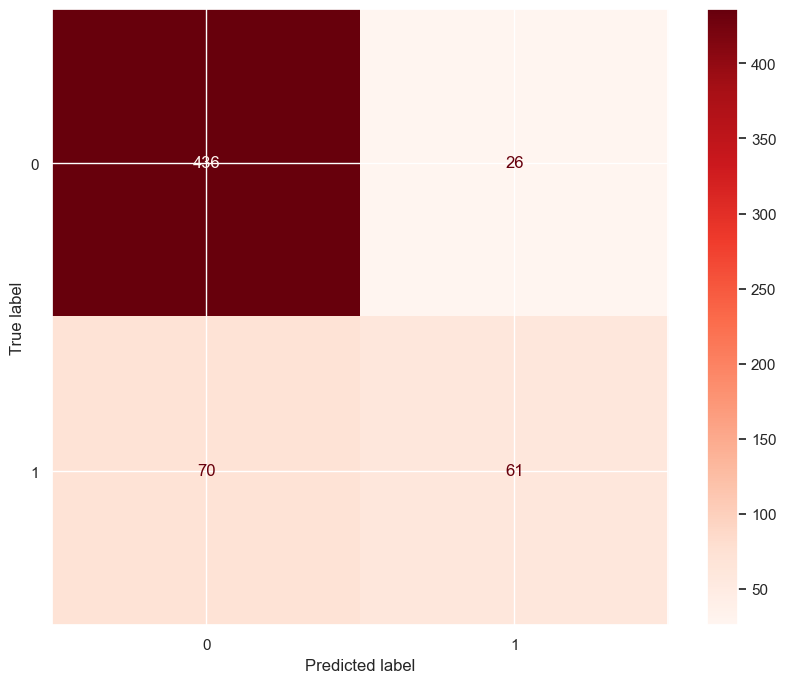

In [46]:
# Check Performance Model against Test-Set

y_pred_test = svm_randomcv_best.predict(X_test_final)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svm_randomcv_best, X_test_final, y_test, cmap='Reds'))

Berdasarkan hasil hyperparameter tuning, didapatkan bahwa jika SVM menggunakan kernal RBF, dengan gamma auto dan C = 1, F1 Score pada SVM tidak berubah jika menggunakan SVM secara default. Dengan demikian, baik setelah menggunakan hyperparameter tuning tidak terjadi perubahan pada F1 Score

# Model Inference

In [47]:
# Mengambil sample inference dari dataframe

df_inference = df.sample(1, random_state=1)

df_inference

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
1765,60000.0,2,2,1,42.0,0.0,0.0,0.0,2.0,2.0,...,55566.0,59331.0,60569.0,2760.0,4941.0,0.0,4675.0,2361.0,0.0,1


Mengambilm data inferencen mennggunakan salah satu sample pada dataset df.

In [48]:
# Melakukan split data numerik dan data kategorial

data_inf_numerik = df_inference[['limit_balance']]
data_inf_kategori = df_inference[['pay_0','pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]

Membagi kolom numerik dan kategori pada data inference

In [49]:
# Melakukan scaling dan encoding pada kolom numerik dan kategori

df_inf_scaled = scaler.transform(data_inf_numerik)

df_inference_final = np.column_stack((df_inf_scaled, data_inf_kategori))

df_inference_final

array([[0.06329114, 0.        , 0.        , 0.        , 2.        ,
        2.        , 2.        ]])

Melakukan scaling pada numerik saja dan menggabungkan data numerik yang sudah di scaling dan data kategori pada data inference

In [50]:
# Melakukan prediksi svm linear
y_pred_inference_knn = svm_randomcv.predict(df_inference_final)

print(f"Hasil prediksi default_pay_next_month : {y_pred_inference_knn}")

Hasil prediksi default_pay_next_month : [0]


Pada saat dilakukan test pada data inferece didapatkan bahwa jika menggunakan data inference, model berhasil melakukan prediksi.

# Model Saving

In [51]:
#Save the files

with open('model_scaler.pkl', 'wb') as file_1:
  pickle.dump(scaler, file_1)

with open('model_svm_random.pkl', 'wb') as file_2:
  pickle.dump(svm_randomcv, file_2)

Melakukan saving pada file scaler dan svm_random untuk membantu proses deployment.

# Overall Analysis

Berdasarkan proses hasil modeling, didapatkan bahwa model yang terbaik untuk memprediksi default_pay_next_month sebagai target terdapat pada model Support Vector Machine dengan kernal RBF, gamma = auto, dan C = 1, jika dibandingkan dengan model Logistic Regression dan K-Nearest Neighbor karena F1 Score yang diberikan pada test lebih baik pada SVM. Kemudian didapatkan bahwa setelah melakukan hyperparameter tuning didapatkan bahwa F1 Score tidak terjadi perubahan yang siginifikan. Walaupun demikian pada data inference masih terdapat salah prediksi jika class 1. 

Adapun jika menggunakan model SVM, Kelebihannya adalah efektif dalam ruang fitur berdimensi tinggi, dapat menangani dataset non-linier, serta  SVM pengklasifikasi pada dasarnya menggunakan subset dari poin pelatihan sehingga hasilnya menggunakan memori yang sangat sedikit. Sedangkan Kelemahan ika menggunakan model SVM adalah memiliki hyperparameter yang cukup banyak dan tidak efisien untuk dataset besar.

Oleh karena itu futher improvement yang dapat dilakukan agar model yang didapatkan jauh lebih baik seperti:

1. Feature Engineering:

Evaluasi dan eksplorasi fitur tambahan yang dapat menambah nilai prediktif pada model.

Mungkin terdapat transformasi variabel atau pembuatan fitur baru yang dapat meningkatkan performa model.

2. Optimasi Hyperparameter Lebih Lanjut:

Meskipun tuning hyperparameter telah dilakukan, perlu dicoba variasi nilai hyperparameter yang lebih luas atau menggunakan metode pencarian yang berbeda untuk memastikan bahwa tidak ada kombinasi hyperparameter yang lebih baik.

Dengan demikian, model tidak hanya dapat memberikan prediksi yang lebih baik.



# Conceptual Problem

1. Coeficient pada Logistic Regression:

Coefficient pada logistic regression mengacu pada nilai-nilai yang menggambarkan seberapa besar dan arah hubungan antara variabel input dan variabel output (target). Dalam konteks logistic regression, model menghitung nilai log-odds atau logit dari probabilitas bahwa observasi akan masuk ke dalam kategori positif. Coefficient (koefisien) ini menunjukkan seberapa besar perubahan dalam log-odds yang diharapkan terjadi ketika variabel input mengalami satu unit perubahan. Koefisien positif menunjukkan bahwa terdapat korelasi positif dengan variabel output, sementara koefisien negatif menunjukkan korelasi negatif.

2. Fungsi Parameter Kernel pada SVM:

Kernel pada Support Vector Machines (SVM) digunakan untuk mengubah data masukan menjadi ruang fitur berdimensi lebih tinggi, sehingga titik data dapat dipisahkan secara linier atau memiliki hubungan yang lebih kompleks. Fungsi kernel memungkinkan SVM untuk menangani data non-linier dan kompleks tanpa menghitung fitur secara eksplisit, yang mungkin mahal atau tidak mungkin dilakukan secara komputasi . Salah satu kernel yang umum digunakan adalah kernel Radial Basis Function (RBF) atau Gaussian kernel. Kernel RBF dapat memodelkan hubungan non-linier dan kompleks antara titik data, dan dapat menciptakan batasan keputusan yang mulus dan melingkar. Kernel RBF cocok untuk data berdimensi sedang dan beragam, yang titik datanya mungkin memiliki skala dan distribusi berbeda. Kernel RBF juga dikenal sebagai kernel Gaussian atau kernel eksponensial [Sumber](https://www.linkedin.com/advice/0/what-best-kernel-functions-support-vector-machine-13hme) . 

3. Cara Memilih K yang Optimal pada KNN: [Sumber](https://lp2m.uma.ac.id/2023/02/16/algoritma-k-nearest-neighbors-knn-pengertian-dan-penerapan/)

Pemilihan nilai K yang optimal pada K-Nearest Neighbors (KNN) dapat dilakukan dengan menggunakan teknik seperti cross-validation. Dengan membagi data menjadi beberapa lipatan (folds), kita dapat mengukur performa model KNN dengan berbagai nilai K dan memilih nilai K yang memberikan kinerja terbaik. Pada setiap iterasi cross-validation, model KNN dilatih dengan K yang berbeda dan diukur performanya. Nilai K yang memberikan hasil rata-rata atau median performa terbaik pada semua iterasi cross-validation dapat dipilih sebagai nilai K optimal.

4. Metrics-Metrics pada Evaluasi Model: [Sumber](https://stevkarta.medium.com/membicarakan-precision-recall-dan-f1-score-e96d81910354)

Accuracy: Rasio prediksi benar (positif dan negatif) terhadap total prediksi. Cocok digunakan ketika distribusi kelas seimbang.
Precision: Rasio prediksi benar positif terhadap total prediksi positif. Berguna ketika fokus pada akurasi prediksi positif.
Recall (Sensitivitas): Rasio prediksi benar positif terhadap total jumlah positif sebenarnya. Penting ketika mengidentifikasi sebanyak mungkin kasus positif.
F1 Score: Harmonic mean antara precision dan recall. Menggabungkan keduanya untuk memberikan nilai yang seimbang dan cocok digunakan pada dataset yang tidak seimbang.
Waktu Penggunaan: Pilihan waktu penggunaan dapat bergantung pada seberapa pentingnya false positives (precision), false negatives (recall), atau keharmonisan keduanya (F1 Score). Precision cocok digunakan untuk mendeteksi sidik jari pada perusahaan/instansi negara agar orang yang seharusnya tidak karyawan tidak terdeteksi sebagai karyawan. Recall cocok digunakan untuk mendeteksi pasien yang seharusnya positive covid-19 tidak terdeteksi sebagai pasien yang negative covid-19.  Accuracy cocok digunakan ketika distribusi kelas seimbang, sedangkan precision dan recall lebih relevan dalam kasus kelas tidak seimbang.